In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [3]:
def parse(x):
    return datetime.strptime(x,'%m/%d/%Y')

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',parse_dates=['Bill_Date'], date_parser=parse)

In [9]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [11]:
print('number of rows: ',df.shape[0])
print('number of columns ',df.shape[1])
print('number of missing values:\n',df.isnull().sum())
print('features :',df.columns.to_list())
print('unique values: ',df.nunique())

number of rows:  53
number of columns  6
number of missing values:
  Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64
features : ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']
unique values:  Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [13]:
bill_df = df.set_index(['Bill_Date'])
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [14]:
bill_amount = bill_df['2016':'2018'][['Billed_amount']]

In [17]:
bill_amount['Billed_amount'].rolling(window=3).mean() ## pick current and previous 2 datapoints

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [18]:
bill_amount['ma_rolling_3']= bill_amount['Billed_amount'].rolling(window=3).mean().shift(1)

### for example to predict april data, take (jan,feb and march data)--- rolling window=3

In [19]:
bill_amount
## moving average does not give advantage on latest data point,, is pretty flat,, sudden change cannot be dected 

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


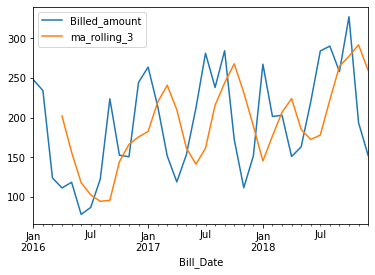

In [20]:
bill_amount.plot()

In [21]:
### though not so great it is able to calculate the seasonality/ fluctuation in the data,, also there is a time lag

### Weighted Moving Averages

In [22]:
def wma(weights):
    '''funciton to calculate weighted moving average'''
    def calc(x):
        return (weights*x).mean()
    return calc

In [23]:
bill_amount['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))) # weights should sum to the window size


Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [24]:
bill_amount['wma_rolling_3'] = bill_amount['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [25]:
bill_amount

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


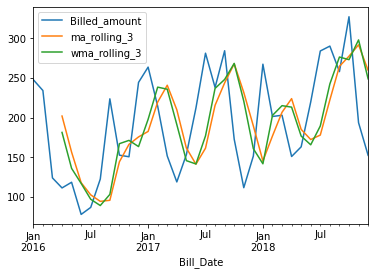

In [26]:
bill_amount.plot()

In [27]:
### wma_ has performed better than the moving average because the approximation is closer to the original value than
## simple moving average

### Exponential moving average (EMA)

better approximation, captures the changes quickly than previous averages

In [28]:
bill_amount['Billed_amount'].ewm(span=3,min_periods=0,adjust=False).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

In [29]:
bill_amount['ewm_window_3']=bill_amount['Billed_amount'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

In [30]:
bill_amount

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


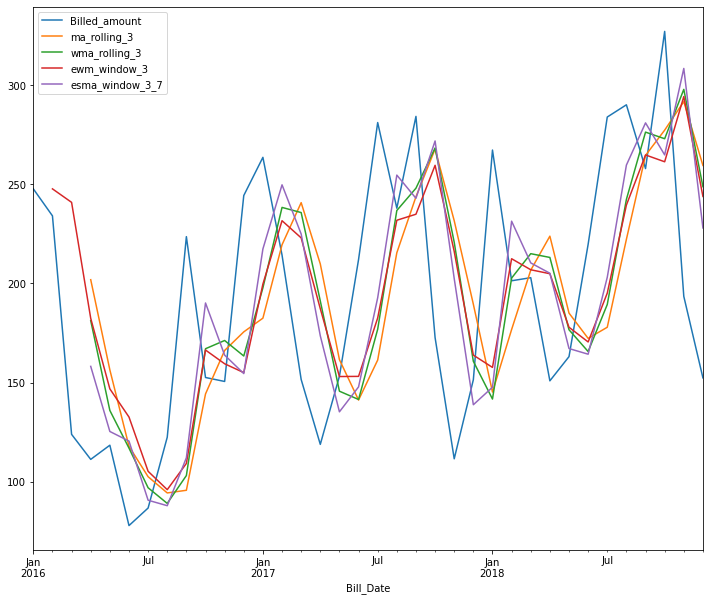

In [38]:
bill_amount.plot(figsize=(12,10))

In [33]:
### using exponential moving average

bill_amount['Billed_amount'].ewm(alpha=0.7, min_periods=3, adjust=False).mean().shift(1)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01    158.153800
2016-05-01    125.300140
2016-06-01    120.449042
2016-07-01     90.601713
2016-08-01     87.849514
2016-09-01    112.034854
2016-10-01    190.144456
2016-11-01    163.821337
2016-12-01    154.524401
2017-01-01    217.416320
2017-02-01    249.772896
2017-03-01    224.955869
2017-04-01    173.564761
2017-05-01    135.222428
2017-06-01    147.792728
2017-07-01    192.793819
2017-08-01    254.671146
2017-09-01    242.980344
2017-10-01    271.904103
2017-11-01    202.454231
2017-12-01    138.793269
2018-01-01    147.631981
2018-02-01    231.413594
2018-03-01    210.369078
2018-04-01    205.147723
2018-05-01    167.146317
2018-06-01    164.292895
2018-07-01    203.119869
2018-08-01    259.721961
2018-09-01    281.021588
2018-10-01    264.878476
2018-11-01    308.496543
2018-12-01    227.991963
Name: Billed_amount, dtype: float64

In [34]:
bill_amount['esma_window_3_7']=bill_amount['Billed_amount'].ewm(alpha=0.7,min_periods=3,adjust=False).mean().shift(1)

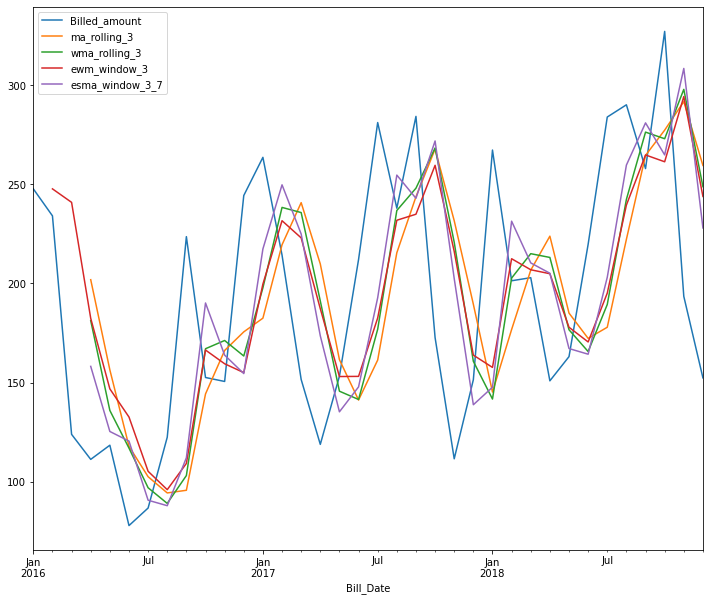

In [37]:
bill_amount.plot(figsize=(12,10))

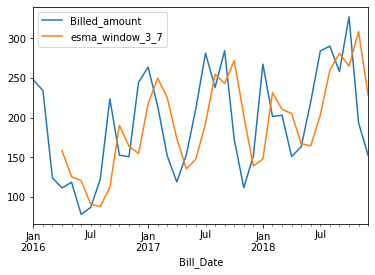

In [39]:
bill_amount[['Billed_amount','esma_window_3_7']].plot()

In [42]:
### let's use less smoothing by choosing the smaller value for alpha

bill_amount['esma_window_3_3']=bill_amount['Billed_amount'].ewm(alpha=0.3,min_periods=3,adjust=False).mean().shift(1)

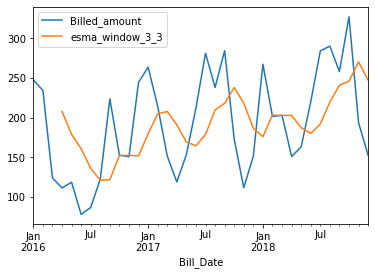

In [43]:
bill_amount[['Billed_amount','esma_window_3_3']].plot()

In [46]:
### lower alpha value gives more weight to alpha than larger value for alpha
### more smoother than 0.7 value,, as it take into consideration the historcial data as well
### but 0.7 was able to capture the trend and fluctuation in the data better than 0.3

### thus choosing smaller value for alpha is a good way to make your datset smoother if it has lot of fluctuations

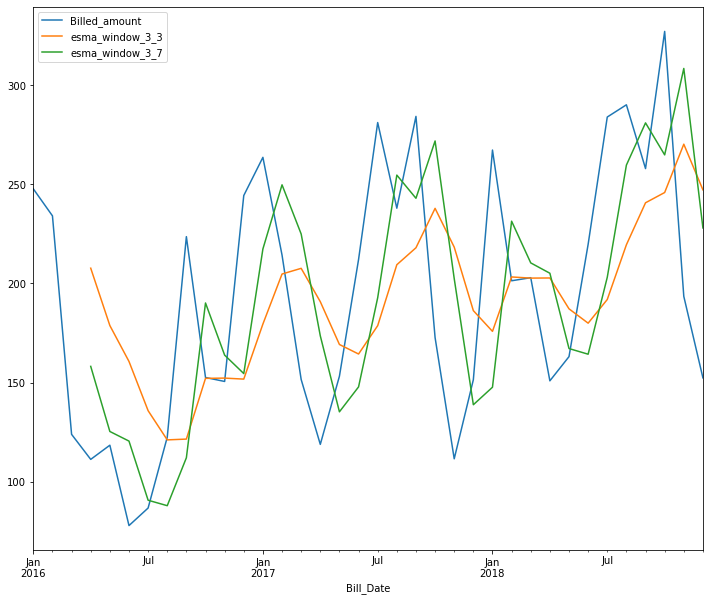

In [48]:
bill_amount[['Billed_amount','esma_window_3_3','esma_window_3_7']].plot(figsize=(12,10))

In [50]:
bill_amount.head()

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esma_window_3_7,esma_window_3_0.3,esma_window_3_3
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.3850,158.15380,207.70580,207.70580
2016-05-01,118.37,156.393333,135.911667,146.8025,125.30014,178.76006,178.76006


In [58]:
def rmse(data_series,col1,col2):
    '''calculate the root mean squared error'''
    (data_series[[col1,col2]]).plot(figsize=(12,10))
    return (((data_series[col1]-data_series[col2])**2).mean())**0.5

70.98561687433802

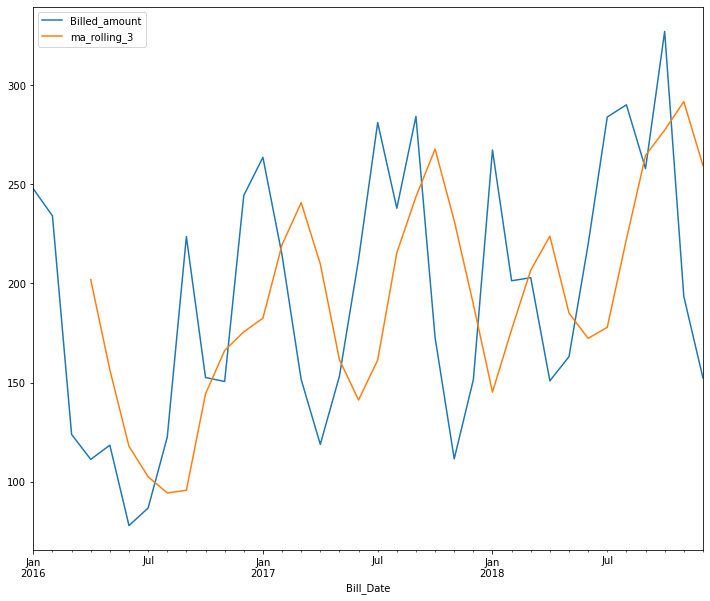

In [59]:
rmse(bill_amount,'Billed_amount','ma_rolling_3')

65.82572602256133

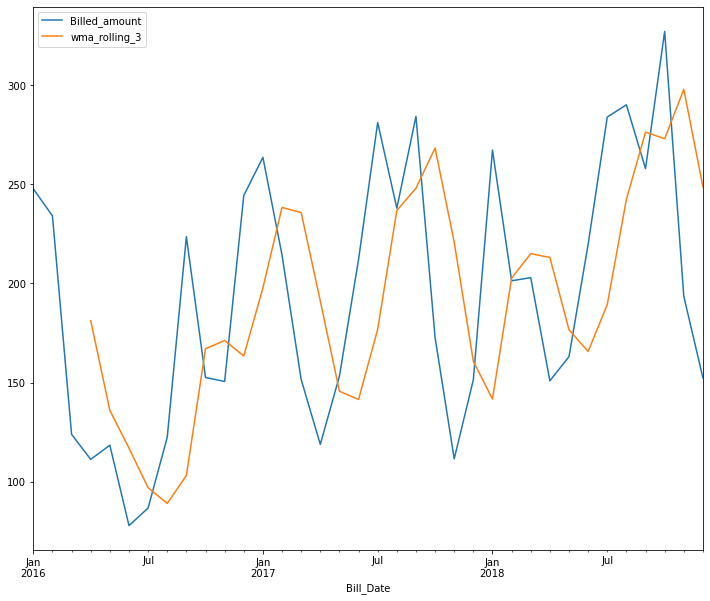

In [60]:
rmse(bill_amount,'Billed_amount','wma_rolling_3')

64.32131239414655

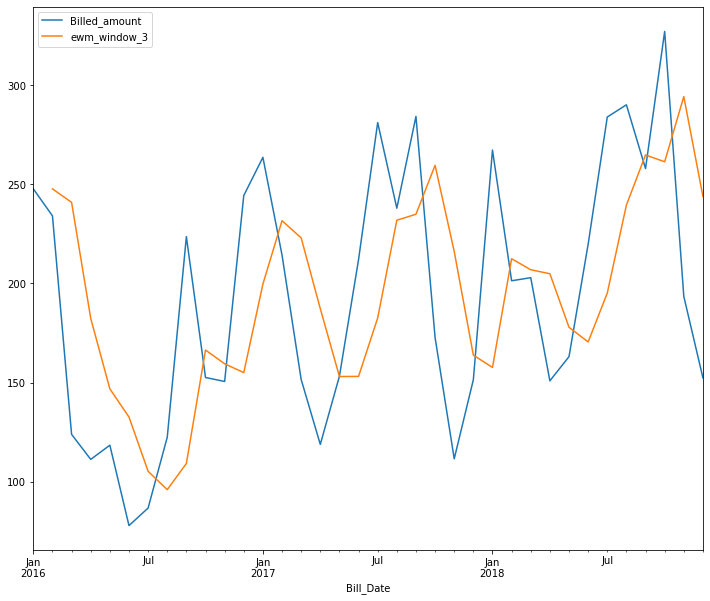

In [61]:
rmse(bill_amount,'Billed_amount','ewm_window_3')

61.26408398853503

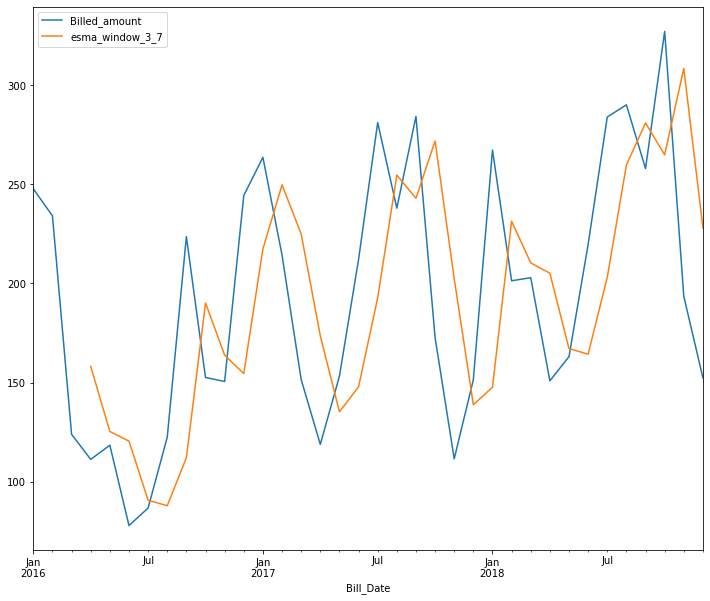

In [62]:
rmse(bill_amount,'Billed_amount','esma_window_3_7') ## exponential smoothing moving average with smoothing factor=0.7

65.22424423118377

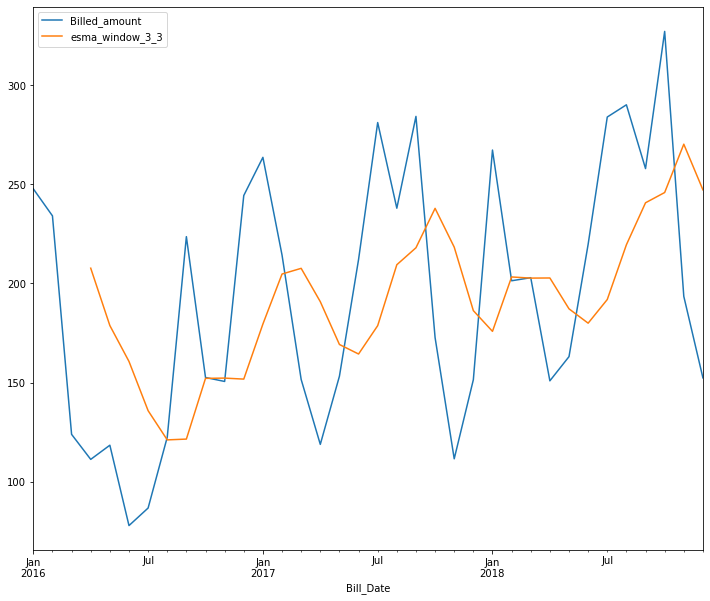

In [63]:
rmse(bill_amount,'Billed_amount','esma_window_3_3')# exponential smoothing moving average with smoothing factor=0.3

In [64]:
## exponential moving average and exponential smoothing average is better for data where there is more fluctuations

In [65]:
## if more fluctuations::: go for more complex models like ARIMA,prophet, LSTM 